# Treinamento de uma Rede Neural Convolucional (CNN)

## Contextualização
A detecção de objetos em imagens é um desafio fundamental na visão computacional, com aplicações que se estendem desde sistemas de segurança até veículos autônomos. As Redes Neurais Convolucionais (CNNs) representam uma revolução neste campo, especialmente com arquiteturas como YOLO (You Only Look Once), que permitem identificações rápidas e precisas de objetos em tempo real.
## Fundamentos de YOLO
YOLO é um algoritmo de detecção de objetos que se destaca por sua velocidade e eficiência. Diferentemente de métodos tradicionais que analisam regiões da imagem sequencialmente, YOLO divide a imagem em uma grade e prevê simultaneamente classes de objetos e suas localizações.


In [ ]:
#@title Instalar as dependências do código
!pip install roboflow ultralytics

from IPython.display import clear_output

clear_output()

Nessa etapa, iremos importar as imagens para o processo de classificação. As imagens vem do [Roboflow](https://universe.roboflow.com/), um site que possui bases de imagens no formato desejado para o modelo.

In [ ]:
#@title Importar os dados do conjunto de gatos, cachorros e pássaros.
import os
from roboflow import Roboflow

rf = Roboflow(api_key="deO5u1tP8oXg2HyoSRT4")
project = rf.workspace("image-classification-y0lsy").project("cats--dogs-and-birds")
version = project.version(3)
dataset = version.download("folder")

# -- format dataset structure
dataset_path = '/content/Cats,-dogs-and-birds-3'
if os.path.exists(dataset_path + '/valid'):
  os.rename(dataset_path + '/valid', dataset_path + '/val')

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Cats,-dogs-and-birds-3 in folder:: 100%|██████████| 161/161 [00:00<00:00, 7584.38it/s]


Para o treinamento de um modelo, é necessário definir por quanto tempo ele irá aprender, ou seja, por quantas épocas ele irá rodar. Mais épocas não necessariamente significa métricas melhores, pois o modelo pode "viciar" nos dados de treinamento, e não ser útil em novos casos. O ajuste das épocas é realizado diversas vezes para garantir as melhores métricas.

In [ ]:
#@title Defina a quantidade de épocas a serem utilizadas no treinamento
from ultralytics import YOLO

epocas = 20 #@param {type:"integer"}

model = YOLO("yolo11n-cls.pt")
results = model.train(data='/content/Cats,-dogs-and-birds-3', epochs=epocas, imgsz=64)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.52M/5.52M [00:00<00:00, 67.1MB/s]


Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolo11n-cls.pt, data=/content/Cats,-dogs-and-birds-3, epochs=20, time=None, patience=100, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

train: Scanning /content/Cats,-dogs-and-birds-3/train... 102 images, 0 corrupt: 100%|██████████| 102/102 [00:00<00:00, 1340.02it/s]

train: New cache created: /content/Cats,-dogs-and-birds-3/train.cache



val: Scanning /content/Cats,-dogs-and-birds-3/val... 29 images, 0 corrupt: 100%|██████████| 29/29 [00:00<00:00, 4028.84it/s]

val: New cache created: /content/Cats,-dogs-and-birds-3/val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)


TensorBoard: model graph visualization added ✅
Image sizes 64 train, 64 val
Using 0 dataloader workers
Logging results to runs/classify/train
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/20         0G      1.296         16         64:  29%|██▊       | 2/7 [00:00<00:01,  3.07it/s]

       1/20         0G      1.314         16         64:  43%|████▎     | 3/7 [00:00<00:01,  3.47it/s]
100%|██████████| 755k/755k [00:00<00:00, 15.1MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  8.27it/s]

                   all      0.448          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 11.53it/s]

                   all      0.517          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 11.39it/s]

                   all      0.552          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all       0.69          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  6.07it/s]

                   all       0.69          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 11.43it/s]

                   all       0.69          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 11.49it/s]

                   all      0.793          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 11.10it/s]

                   all      0.828          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]

                   all      0.828          1



      Epoch    GPU_mem       loss  Instances       Size


      10/20         0G      0.482          6         64: 100%|██████████| 7/7 [00:01<00:00,  6.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 11.55it/s]

                   all      0.828          1



      Epoch    GPU_mem       loss  Instances       Size


      11/20         0G     0.3435          6         64: 100%|██████████| 7/7 [00:01<00:00,  5.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  7.36it/s]

                   all      0.793          1



      Epoch    GPU_mem       loss  Instances       Size


      12/20         0G     0.4301          6         64: 100%|██████████| 7/7 [00:01<00:00,  4.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  7.29it/s]

                   all      0.897          1



      Epoch    GPU_mem       loss  Instances       Size


      13/20         0G     0.3904          6         64: 100%|██████████| 7/7 [00:01<00:00,  5.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 11.18it/s]

                   all      0.828          1



      Epoch    GPU_mem       loss  Instances       Size


      14/20         0G     0.3352          6         64: 100%|██████████| 7/7 [00:01<00:00,  6.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 11.26it/s]

                   all      0.828          1



      Epoch    GPU_mem       loss  Instances       Size


      15/20         0G     0.3016          6         64: 100%|██████████| 7/7 [00:01<00:00,  6.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  9.02it/s]

                   all      0.862          1



      Epoch    GPU_mem       loss  Instances       Size


      16/20         0G     0.3423          6         64: 100%|██████████| 7/7 [00:01<00:00,  6.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 10.02it/s]

                   all      0.862          1



      Epoch    GPU_mem       loss  Instances       Size


      17/20         0G     0.3141          6         64: 100%|██████████| 7/7 [00:01<00:00,  6.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 11.04it/s]

                   all      0.897          1



      Epoch    GPU_mem       loss  Instances       Size


      18/20         0G     0.2982          6         64: 100%|██████████| 7/7 [00:01<00:00,  6.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 11.42it/s]

                   all      0.862          1



      Epoch    GPU_mem       loss  Instances       Size


      19/20         0G     0.2497          6         64: 100%|██████████| 7/7 [00:01<00:00,  5.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  7.74it/s]

                   all      0.862          1



      Epoch    GPU_mem       loss  Instances       Size


      20/20         0G     0.3456          6         64: 100%|██████████| 7/7 [00:01<00:00,  4.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  7.10it/s]

                   all      0.862          1



20 epochs completed in 0.011 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.2MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.2MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n-cls summary (fused): 112 layers, 1,529,867 parameters, 0 gradients, 3.2 GFLOPs
train: /content/Cats,-dogs-and-birds-3/train... found 102 images in 3 classes ✅ 
val: /content/Cats,-dogs-and-birds-3/val... found 29 images in 3 classes ✅ 
test: /content/Cats,-dogs-and-birds-3/test... found 16 images in 3 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 10.94it/s]


                   all      0.897          1
Speed: 0.0ms preprocess, 1.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


In [ ]:
#@title Faça a validação das métricas obtidas pelo modelo.
model.val()

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n-cls summary (fused): 112 layers, 1,529,867 parameters, 0 gradients, 3.2 GFLOPs
train: /content/Cats,-dogs-and-birds-3/train... found 102 images in 3 classes ✅ 
val: /content/Cats,-dogs-and-birds-3/val... found 29 images in 3 classes ✅ 
test: /content/Cats,-dogs-and-birds-3/test... found 16 images in 3 classes ✅ 


val: Scanning /content/Cats,-dogs-and-birds-3/val... 29 images, 0 corrupt: 100%|██████████| 29/29 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 10.48it/s]


                   all      0.897          1
Speed: 0.0ms preprocess, 3.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7edf80d11720>
curves: []
curves_results: []
fitness: 0.9482758641242981
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.8965517282485962, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9482758641242981}
save_dir: PosixPath('runs/classify/train2')
speed: {'preprocess': 0.0015456100990032327, 'inference': 3.2437587606495826, 'loss': 0.0002466399094154095, 'postprocess': 0.00020553325784617455}
task: 'classify'
top1: 0.8965517282485962
top5: 1.0

Nesse momento, vamos fazer upload de uma ou mais imagens para avaliar a inferência do modelo. Rode a célula abaixo e clique em "Procurar" para importar uma imagem ao código.

In [ ]:
#@title Fazer upload de imagens para classificação
from google.colab import files
from IPython.display import Image

uploaded = files.upload()


Saving Captura de tela 2024-12-03 162442.png to Captura de tela 2024-12-03 162442.png



0: 64x64 dog 0.97, Cat 0.02, bird 0.01, 11.3ms
Speed: 4.6ms preprocess, 11.3ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)


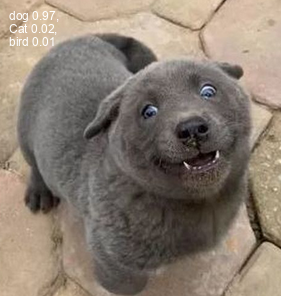

In [ ]:
#@title Fazer a classificação das imagens
results = model(list(uploaded.keys()))

for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen